Dataset obtained from: https://archive.ics.uci.edu/dataset/73/mushroom

# Prepare data

In [ ]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Read the dataframe and add column titles
cols = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
df = pd.read_csv("agaricus-lepiota.data", names=cols)

In [ ]:
# Check dataframe
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Function to convert letters to integers
def convert_column_to_int(column):
  letter_to_int = {}
  next_int = 0 # Start at 0 for each column
  result = []

  for letter in column:
    if letter not in letter_to_int: # Use a new integer for every new letter (per column)
      letter_to_int[letter] = next_int
      next_int += 1
    result.append(letter_to_int[letter])

  return result

In [ ]:
# Convert letters to integers
df = df.apply(convert_column_to_int)

In [ ]:
# Check dataframe
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


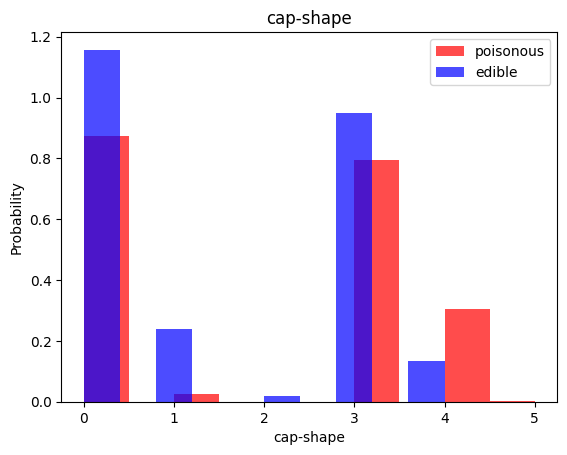

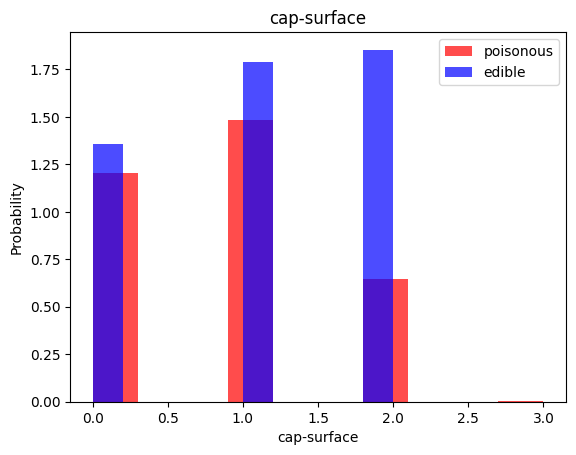

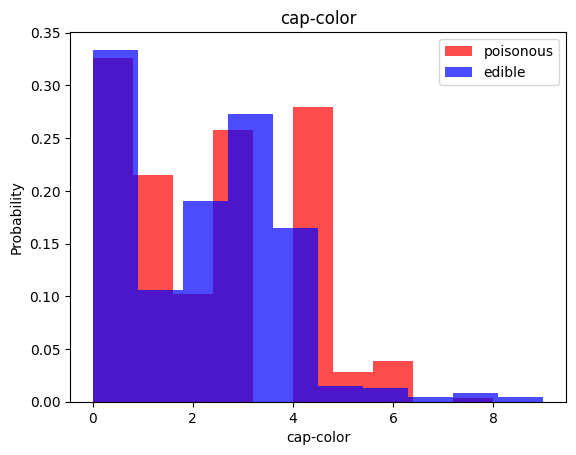

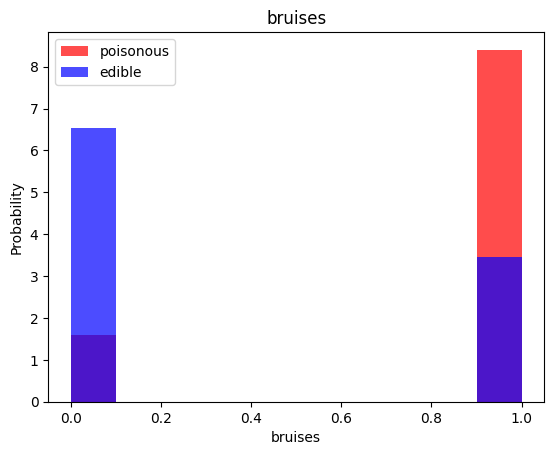

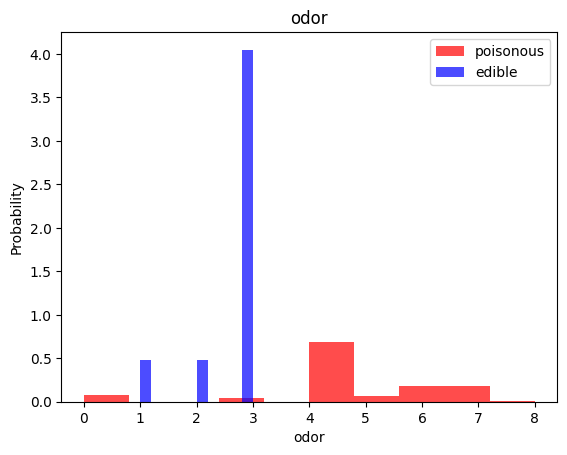

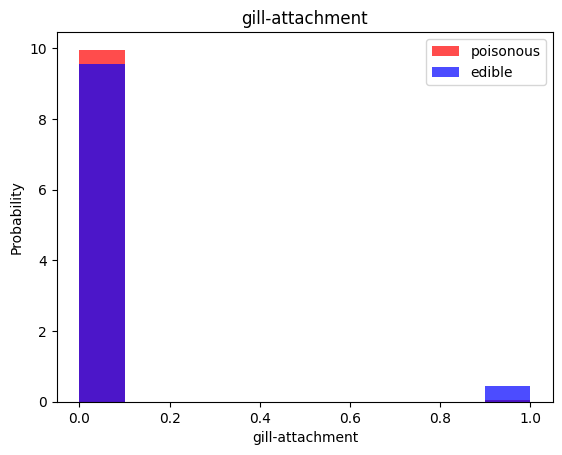

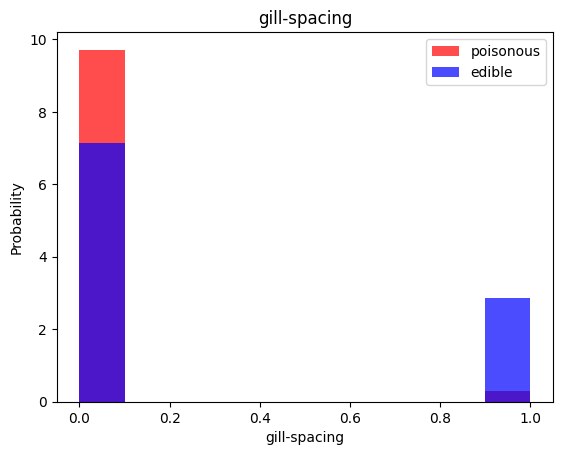

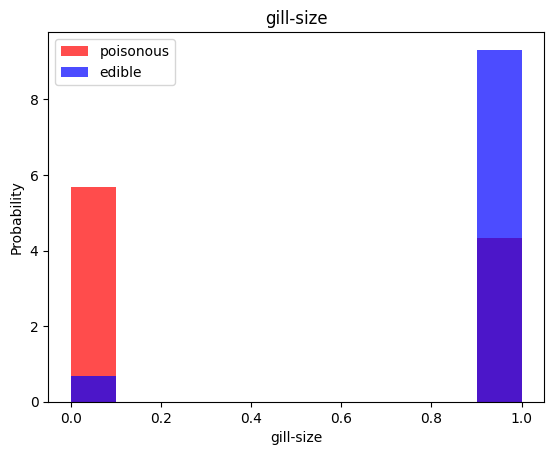

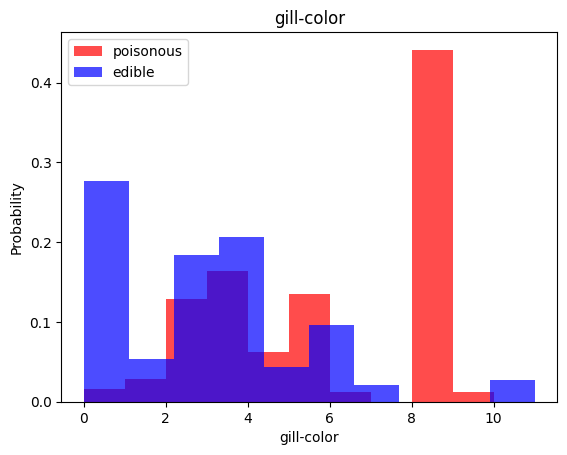

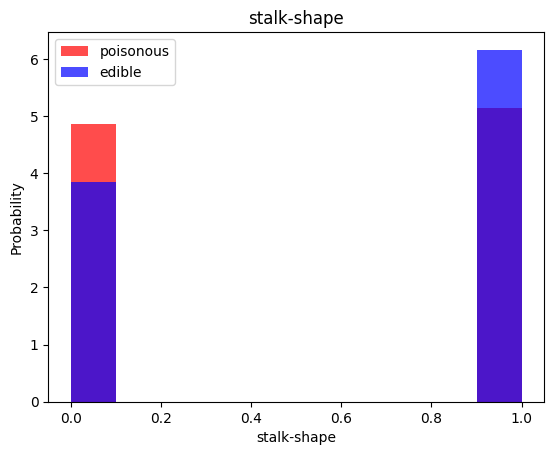

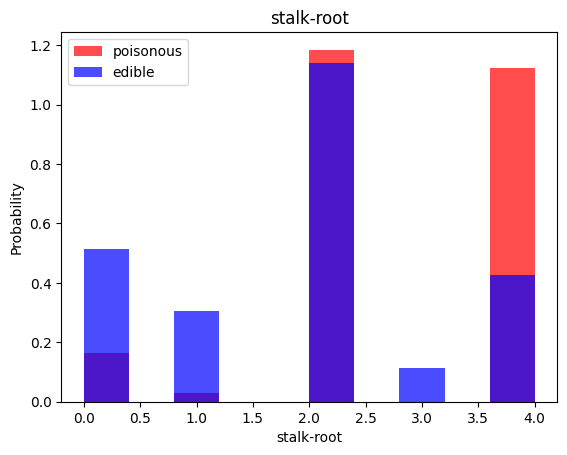

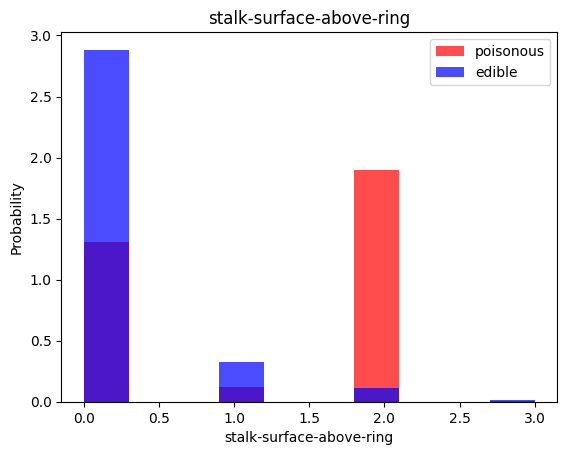

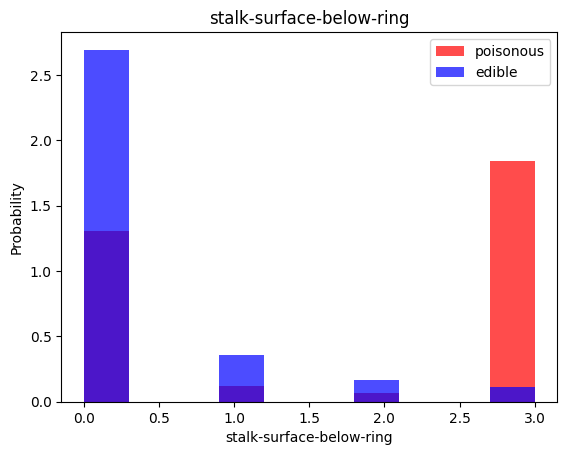

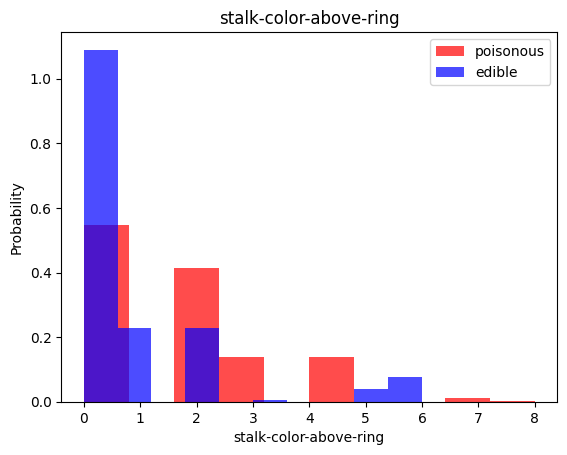

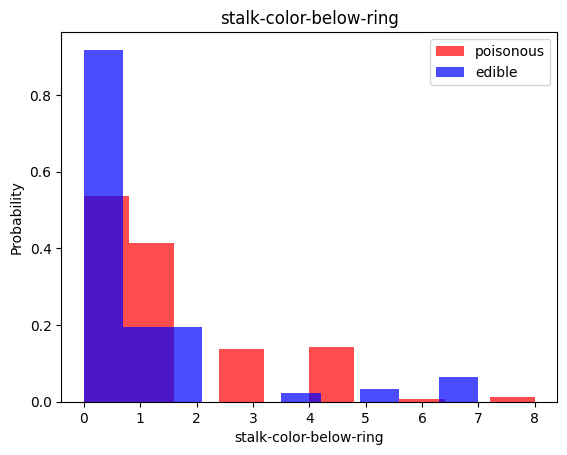

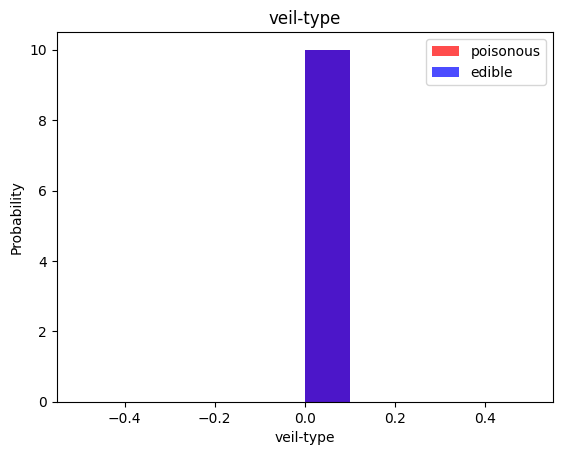

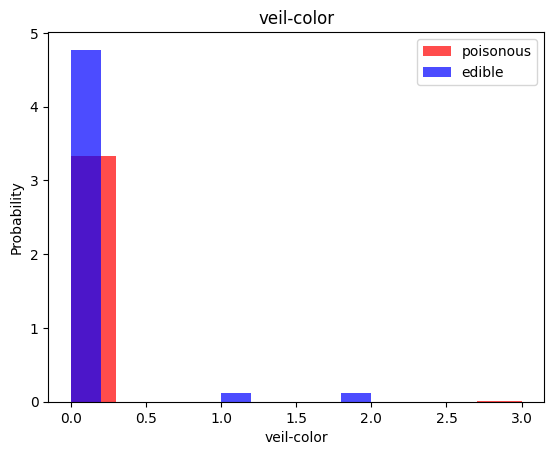

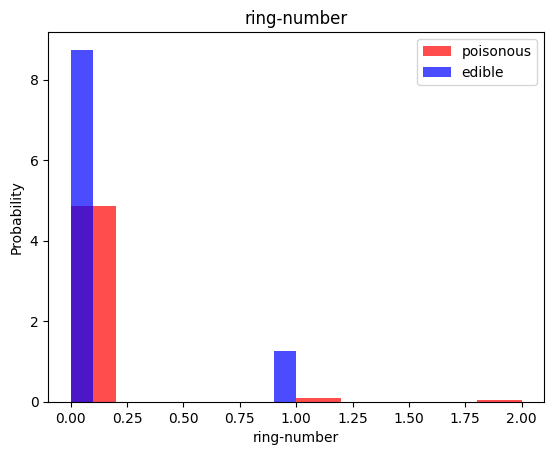

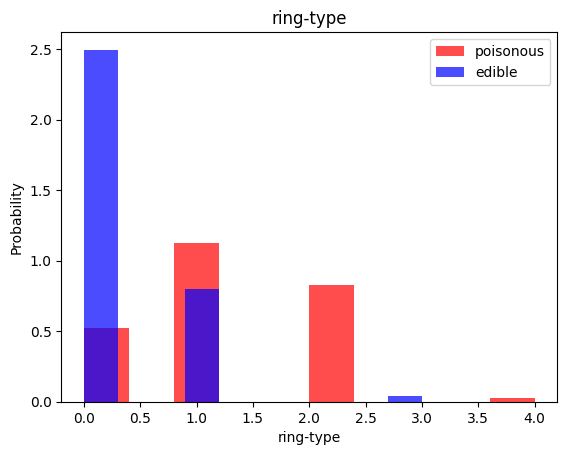

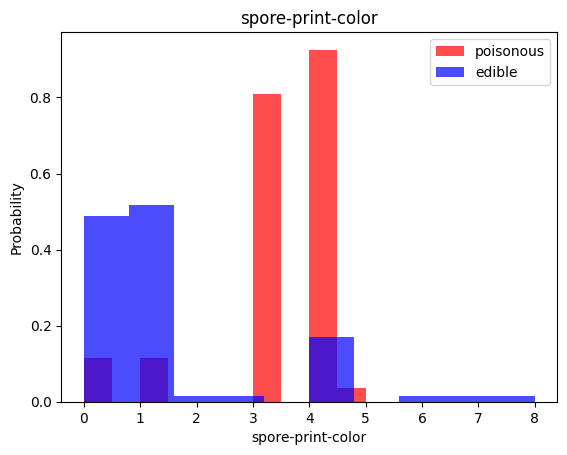

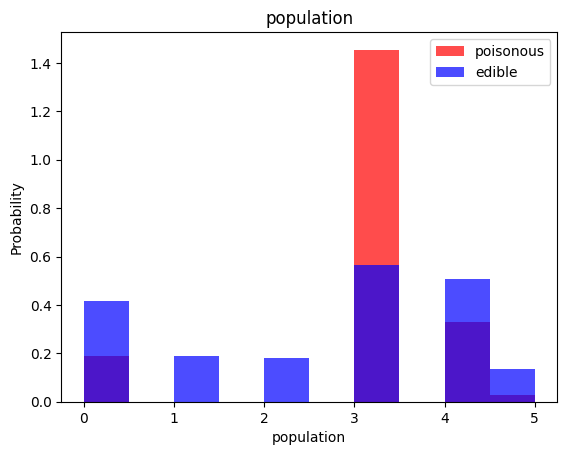

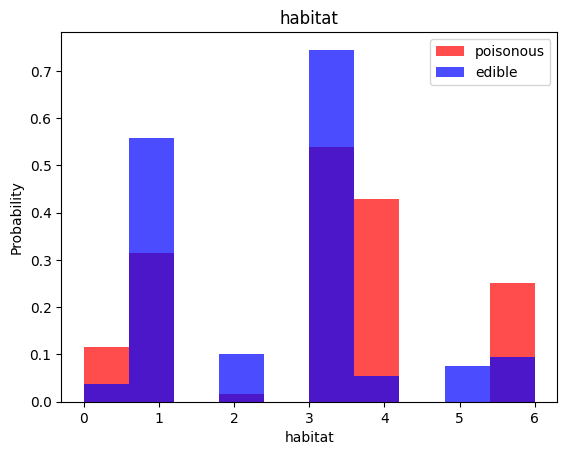

In [ ]:
# Show histograms of poisonous/edible probability for each feature
for label in cols[1:]:
  plt.hist(df[df["poisonous"]==0][label], color="red", label="poisonous", alpha=0.7, density=True)
  plt.hist(df[df["poisonous"]==1][label], color="blue", label="edible", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Remove columns with less helpful information
df = df.drop(["cap-shape", "cap-surface", "cap-color", "gill-attachment", "stalk-shape", "veil-type", "veil-color", "ring-number"], axis=1)

In [ ]:
# Check dataframe
df.head()

,poisonous,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1
2,1,0,2,0,1,1,1,0,0,0,0,0,1,1,2
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,3,1,1,0,0,0,0,0,0,1,1,2,1


# Split into training/validation/testing datasets

In [ ]:
# Check that data is split relatively evenly between poisonous/edible
print(f"Number of poisonous:", len(df[df["poisonous"]==0]["poisonous"]))
print(f"Number of edible:", len(df[df["poisonous"]==1]))

Number of poisonous: 3916
Number of edible: 4208


In [ ]:
# Shuffle and split data into train/valid/test
shuffled_df = df.sample(frac=1)
train_df, valid_df, test_df = np.split(shuffled_df, [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# Get X and y for train/valid/test
X_train = train_df.iloc[:, 1:].to_numpy()
y_train = train_df.iloc[:, 0].to_numpy()

X_valid = valid_df.iloc[:, 1:].to_numpy()
y_valid = valid_df.iloc[:, 0].to_numpy()

X_test = test_df.iloc[:, 1:].to_numpy()
y_test = test_df.iloc[:, 0].to_numpy()

# k-Nearest Neighbors

In [ ]:
# Import statements
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Test the model
y_pred = knn_model.predict(X_test)

In [ ]:
# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Naive Bayes

In [ ]:
# Import statements
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Test the model
y_pred = nb_model.predict(X_test)

In [ ]:
# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       783
           1       0.85      0.96      0.90       842

    accuracy                           0.89      1625
   macro avg       0.90      0.89      0.89      1625
weighted avg       0.90      0.89      0.89      1625



# Logistic Regression

In [ ]:
# Import statements
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create and train the model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Test the model
y_pred = lg_model.predict(X_test)

In [ ]:
# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       783
           1       0.98      0.98      0.98       842

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



# Support Vector Machine

In [ ]:
# Import statements
from sklearn.svm import SVC

In [ ]:
# Create and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Test the model
y_pred = svm_model.predict(X_test)

In [ ]:
# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Neural Network

In [ ]:
# Import statements
import tensorflow as tf

In [ ]:
# Create and train the model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(len(X_train[0]),)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), verbose=0)

In [ ]:
# Test the model
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

51/51 [==============================] - 0s 3ms/step


In [ ]:
# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

